In [1]:
%matplotlib notebook
import numpy as np
from scipy import ndimage
import scipy.interpolate as si
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import glob, os, time
import pandas as pd
from tqdm import tqdm
import itertools

In [2]:
def fit_linear(df, t1, t2):
    df2fit = df.query("timeh >= @t1 and timeh<= @t2")
    z = np.polyfit(df2fit.timeh, df2fit.area_mm2, 1)
    p = np.poly1d(z)
    return p, z

In [3]:
folder_in = "/home/fdutka/Dropbox/ProjektyNaukowe/Dissolution/3. Eksperymenty/Notebooks"
filelist = glob.glob(folder_in+"/*areas.csv")
ldf = []
lfits = []
for f in filelist:
    df = pd.read_csv(f)[['timeh','area_mm2']]
    df = df.query("area_mm2 >0").sort_values(by = "timeh")
    p1, z1 = fit_linear(df, df.iloc[0].timeh, df.iloc[-1].timeh)
    lfits.append([p1,z1])
    df['areadiff'] = df.apply(lambda x: np.absolute(x.area_mm2-p1(x.timeh))/p1(x.timeh), axis = 1)
    #df =df.query("areadiff < 0.02")
    ldf.append(df)

In [4]:
filelist

['/home/fdutka/Dropbox/ProjektyNaukowe/Dissolution/3. Eksperymenty/Notebooks/2017_07_06_areas.csv',
 '/home/fdutka/Dropbox/ProjektyNaukowe/Dissolution/3. Eksperymenty/Notebooks/plaster_2018_04_30_areas.csv',
 '/home/fdutka/Dropbox/ProjektyNaukowe/Dissolution/3. Eksperymenty/Notebooks/2018_03_10_areas.csv',
 '/home/fdutka/Dropbox/ProjektyNaukowe/Dissolution/3. Eksperymenty/Notebooks/plaster_2017_07_07_areas.csv',
 '/home/fdutka/Dropbox/ProjektyNaukowe/Dissolution/3. Eksperymenty/Notebooks/2018_04_30_areas.csv']

<IPython.core.display.Javascript object>


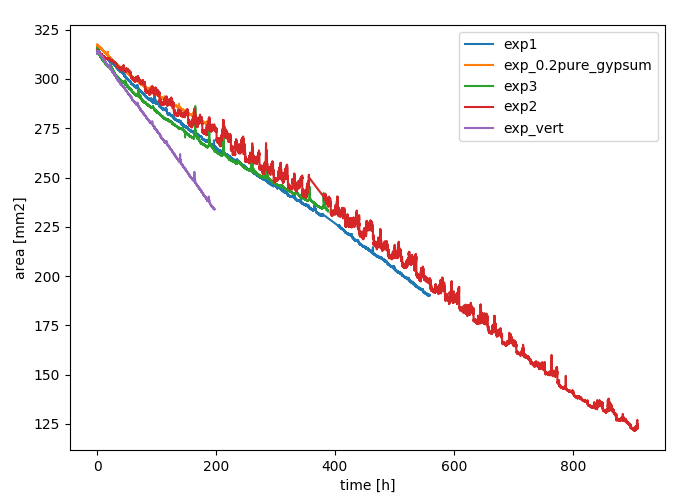

Text(0,0.5,'area [mm2]')

In [5]:
labels = ['exp1', 'exp_0.2pure_gypsum', 'exp3', 'exp2', 'exp_vert', 'sim']

fig = plt.figure(figsize = (7,5))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)

ax = fig.add_axes([.1,.1,.85,.85])
i = 0
for i in range(len(ldf)):
    df = ldf[i].query("areadiff < 0.05")
    ax.plot(df.timeh, df.area_mm2, '-', label = labels[i])
ax.legend()
ax.set_xlabel("time [h]")
ax.set_ylabel("area [mm2]")

In [9]:
filename = os.path.join(folder_in, "comparison2.png")
#fig.savefig(filename, dpi =300)

In [9]:
lfits

[[poly1d([-2.12645659e-01,  3.09655373e+02]),
  array([-2.12645659e-01,  3.09655373e+02])],
 [poly1d([-2.07877882e-01,  3.14329644e+02]),
  array([-2.07877882e-01,  3.14329644e+02])],
 [poly1d([-1.89538155e-01,  3.04535336e+02]),
  array([-1.89538155e-01,  3.04535336e+02])],
 [poly1d([-2.13397422e-01,  3.15498382e+02]),
  array([-2.13397422e-01,  3.15498382e+02])],
 [poly1d([ -0.4064554, 314.2926612]), array([ -0.4064554, 314.2926612])]]